<a href="https://colab.research.google.com/github/Gandhar1606/Feature_Engineering/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Feature Enginneering**

### **Image Dataset**

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelBinarizer
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
# X_train, y_train are used for the assignment steps
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"Initial X_train Shape: {X_train.shape}")
print(f"Initial y_train Shape: {y_train.shape}")
print(f"Initial Pixel Min/Max: {X_train.min()} / {X_train.max()}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Initial X_train Shape: (60000, 28, 28)
Initial y_train Shape: (60000,)
Initial Pixel Min/Max: 0 / 255


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("--- Data Array Shapes ---")
print(f"X_train (Image Data) Shape: {X_train.shape}")
print(f"y_train (Labels) Shape: {y_train.shape}")
print(f"X_train data type: {X_train.dtype}")
print(f"Pixel Range: {X_train.min()} to {X_train.max()}")

--- Data Array Shapes ---
X_train (Image Data) Shape: (60000, 28, 28)
y_train (Labels) Shape: (60000,)
X_train data type: uint8
Pixel Range: 0 to 255


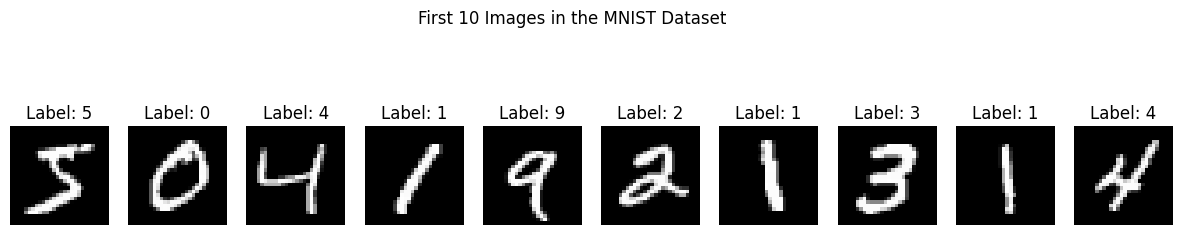

In [7]:
## Display a sample of the images

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 10, figsize=(15, 3))

# Loop through the first 10 samples
for i in range(10):
    # Display the image
    axes[i].imshow(X_train[i], cmap='gray')

    # Set the title to the corresponding label
    axes[i].set_title(f"Label: {y_train[i]}")

    # Remove axis ticks and labels for cleaner display
    axes[i].axis('off')

plt.suptitle("First 10 Images in the MNIST Dataset", y=1.05)
plt.show()

In [2]:
## 1. Feature Scaling (Normalization)

# Convert to float32 and scale pixel values to [0, 1]
# This is a Min-Max scaling step where Min=0 and Max=255.
X_scaled = X_train.astype('float32') / 255.0

print("--- Scaling (Normalization) Complete ---")
print(f"X_scaled Shape: {X_scaled.shape}")
print(f"Scaled Pixel Min/Max: {X_scaled.min()} / {X_scaled.max()}")

--- Scaling (Normalization) Complete ---
X_scaled Shape: (60000, 28, 28)
Scaled Pixel Min/Max: 0.0 / 1.0


In [3]:
# The original shape is (60000, 28, 28). We want (60000, 784).

## 2. Feature Extraction (Flattening)
n_samples = X_scaled.shape[0]
n_features = X_scaled.shape[1] * X_scaled.shape[2]

# Reshape the 2D image data into a 1D vector
X_flattened = X_scaled.reshape(n_samples, n_features)

print("--- Flattening Complete ---")
print(f"X_flattened Shape: {X_flattened.shape}")
print(f"Total Features (Pixels): {n_features}")

--- Flattening Complete ---
X_flattened Shape: (60000, 784)
Total Features (Pixels): 784


In [4]:
## 3. Encoding Categorical Variables (One-Hot Encoding)

# Use LabelBinarizer or OneHotEncoder from scikit-learn
encoder = LabelBinarizer()
y_encoded = encoder.fit_transform(y_train)

print("--- One-Hot Encoding Complete ---")
print(f"y_encoded Shape: {y_encoded.shape}")
print(f"Example of label '5' (original): {y_train[0]}")
print(f"Example of label '5' (encoded): {y_encoded[0]}")

--- One-Hot Encoding Complete ---
y_encoded Shape: (60000, 10)
Example of label '5' (original): 5
Example of label '5' (encoded): [0 0 0 0 0 1 0 0 0 0]


In [5]:
## 4. Feature Selection (Variance Threshold)

# Pixels that are always black (0) or near-black have low variance.
# We set a threshold to remove columns where pixel variance is very low.
# Note: For MNIST, this typically removes the corner/border pixels.

# Instantiate the selector (removing features with variance <= 0.001)
selector = VarianceThreshold(threshold=(0.001))
X_selected = selector.fit_transform(X_flattened)

original_features = X_flattened.shape[1]
selected_features = X_selected.shape[1]

print("--- Feature Selection (Variance Threshold) Complete ---")
print(f"Original number of features (pixels): {original_features}")
print(f"Number of features selected: {selected_features}")
print(f"Features removed: {original_features - selected_features}")

--- Feature Selection (Variance Threshold) Complete ---
Original number of features (pixels): 784
Number of features selected: 545
Features removed: 239


### **Text Dataset**

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the Iris dataset
iris = load_iris(as_frame=True)
df = iris.frame

# Separate features (X) and target (y)
X = df.drop(columns=['target'])
y = df['target']

# Note: The target column is currently numeric (0, 1, 2) but the names are in iris.target_names
print(f"Features (X) Shape: {X.shape}")
print(f"Target (y) Shape: {y.shape}")
print(f"Features columns: {X.columns.tolist()}")

Features (X) Shape: (150, 4)
Target (y) Shape: (150,)
Features columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
## 1. Handle Missing Data (Demonstration)

# Artificially introduce a NaN to demonstrate imputation
X_missing = X.copy()
X_missing.loc[10, 'sepal length (cm)'] = np.nan
print(f"Value before imputation (Index 10, 'sepal length (cm)'): {X_missing.loc[10, 'sepal length (cm)']}")

# Use SimpleImputer (Mean Imputation)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform only on the numeric features
X_imputed = pd.DataFrame(imputer.fit_transform(X_missing),
                         columns=X_missing.columns)

print("--- Missing Data Imputation Complete ---")
print(f"Value after imputation: {X_imputed.loc[10, 'sepal length (cm)']:.4f}")
print(f"Any NaN values remaining: {X_imputed.isnull().sum().sum()}")

Value before imputation (Index 10, 'sepal length (cm)'): nan
--- Missing Data Imputation Complete ---
Value after imputation: 5.8463
Any NaN values remaining: 0


In [10]:
## 2. Encode Categorical Variables (Target)

# Target Labels: Setosa (0), Versicolor (1), Virginica (2)
# Label Encoding is suitable for the target variable (y)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Note: If we had a categorical FEATURE, we would use One-Hot Encoding
# to avoid imposing an artificial order.

print("--- Categorical Encoding Complete (Target) ---")
print(f"Original unique values: {np.unique(y)}")
print(f"Encoded unique values: {np.unique(y_encoded)}")
print(f"Original Class Names: {iris.target_names}")

--- Categorical Encoding Complete (Target) ---
Original unique values: [0 1 2]
Encoded unique values: [0 1 2]
Original Class Names: ['setosa' 'versicolor' 'virginica']


In [11]:
## 3. Feature Scaling (Standardization)

scaler = StandardScaler()

# Fit and transform the imputed data
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed),
                        columns=X_imputed.columns)

print("--- Feature Scaling (Standardization) Complete ---")
print(f"Mean of 'sepal length (cm)' after scaling: {X_scaled['sepal length (cm)'].mean():.4f}")
print(f"Standard Deviation of 'sepal length (cm)' after scaling: {X_scaled['sepal length (cm)'].std():.4f}")

--- Feature Scaling (Standardization) Complete ---
Mean of 'sepal length (cm)' after scaling: 0.0000
Standard Deviation of 'sepal length (cm)' after scaling: 1.0034


In [12]:
## 4. Feature Extraction/Dimensionality Reduction (PCA)

# Initialize PCA to keep 2 components
pca = PCA(n_components=2)

# Fit and transform the scaled data
X_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame for clarity
X_pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])

print("--- PCA Dimensionality Reduction Complete ---")
print(f"Original Feature Count: {X_scaled.shape[1]}")
print(f"New Feature Count: {X_pca_df.shape[1]}")
print(f"Variance explained by PC1: {pca.explained_variance_ratio_[0]:.4f}")
print(f"Total variance explained by 2 components: {pca.explained_variance_ratio_.sum():.4f}")

--- PCA Dimensionality Reduction Complete ---
Original Feature Count: 4
New Feature Count: 2
Variance explained by PC1: 0.7281
Total variance explained by 2 components: 0.9575


In [13]:
## 5. Feature Selection (SelectKBest)

# Re-use the scaled data (X_scaled) and encoded target (y_encoded)
# Select the top 3 best features
selector = SelectKBest(score_func=f_classif, k=3)

# Fit and transform
X_selected = selector.fit_transform(X_scaled, y_encoded)

# Get the names of the selected features
selected_indices = selector.get_support(indices=True)
selected_features = X_scaled.columns[selected_indices].tolist()

print("--- Feature Selection (SelectKBest) Complete ---")
print(f"Original Feature Count: {X_scaled.shape[1]}")
print(f"Selected Feature Count: {X_selected.shape[1]}")
print(f"Selected Features: {selected_features}")

--- Feature Selection (SelectKBest) Complete ---
Original Feature Count: 4
Selected Feature Count: 3
Selected Features: ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']


In [14]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# --- Re-execute necessary loading and preprocessing steps to ensure variables are defined ---

# 1. Load Data
iris = load_iris(as_frame=True)
df = iris.frame
X = df.drop(columns=['target'])
y = df['target']

# 2. Imputation (using the clean data since the NaN was for demonstration)
X_imputed = X.copy()

# 3. Encoding (Target)
y_encoded = y # y is already 0, 1, 2

# 4. Scaling (Standardization)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed),
                        columns=X_imputed.columns)

# 5. Feature Selection (SelectKBest for top 3)
selector = SelectKBest(score_func=f_classif, k=3)
X_selected_array = selector.fit_transform(X_scaled, y_encoded)
selected_indices = selector.get_support(indices=True)
selected_features = X_scaled.columns[selected_indices].tolist()

# Convert the resulting array back to a DataFrame with column names
X_selected_df = pd.DataFrame(X_selected_array, columns=selected_features)

# --- Display Results ---

print("--- 1. Initial Raw Dataset (First 5 Rows) ---")
# Display the initial, raw dataset before any transformations
print(df.head())

print("\n" + "="*70 + "\n")

print(f"--- 2. Final Dataset After Feature Selection (Top 3 Features: {selected_features}) ---")
# Display the final, transformed dataset ready for modeling
print(X_selected_df.head())

--- 1. Initial Raw Dataset (First 5 Rows) ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


--- 2. Final Dataset After Feature Selection (Top 3 Features: ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']) ---
   sepal length (cm)  petal length (cm)  petal width (cm)
0          -0.900681          -1.340227         -1.315444
1          -1.143017          -1.340227         -1.315444
2          -1.385353          -1.397064         -1.315444
3          -1.506521          -1.283389    